In [1]:
import csv
from datetime import datetime as date

from currentCompanySentiment import current_company_sentiment
from getStockStats import get_stock_stats, evaluate_price
from makeStockRNN import sort_stock_data, preprocess_stock_data, make_stock_rnn

In [2]:
print(f"Today's date: {date.today()}\n")
print('COMPANIES')
print('0 : AAPL (Apple)')
print('1 : AMZN (Amazon)')
print('2 : F (Ford)')
print('3 : GOOGL (Google)')
print('4 : MSFT (Microsoft)')
print('5 : NFLX (Netflix)')
print('6 : TSLA (Tesla)\n')
ticker_val = int(float(input('Get the most recent sentiment on a specific company. Enter an integer: ')))
print('')
cur_ticker, company_name, overall_eval_int = current_company_sentiment(ticker_val)

file = open(f'{company_name}_sentiments.csv', 'a')
writer = csv.writer(file)
writer.writerow([f'{date.today()}', overall_eval_int])
file.close()

Today's date: 2019-07-23 17:29:08.429999

COMPANIES
0 : AAPL (Apple)
1 : AMZN (Amazon)
2 : F (Ford)
3 : GOOGL (Google)
4 : MSFT (Microsoft)
5 : NFLX (Netflix)
6 : TSLA (Tesla)

Get the most recent sentiment on a specific company. Enter an integer: 0

You chose:
0 : AAPL (Apple)

Article #1 name: Apple's Heir Apparent Is Much Like Current CEO Tim Cook
Yahoo Finance Apple article #1 opened.
Apple article #1 sentiment: Good.

Article #2 name: Dow Jones Futures: Apple-Intel Modem Chip Report Lifts Intel; Qualms For Qualcomm?
Yahoo Finance Apple article #2 opened.
Apple article #2 sentiment: Neutral.

Current Apple sentiment: Good.


---

In [3]:
seq_length = int(input('Enter training period (in days): '))
target_length = int(input('Enter no. of days ahead (has to be less than training period): '))

while target_length > seq_length:
    target_length = int(input('Try again. Enter no. of days ahead (has to be less than training period): '))

Enter training period (in days): 60
Enter no. of days ahead (has to be less than training period): 30


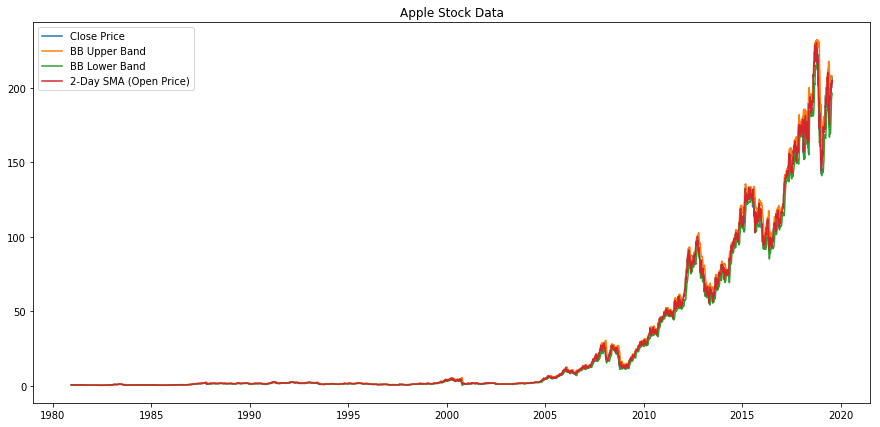

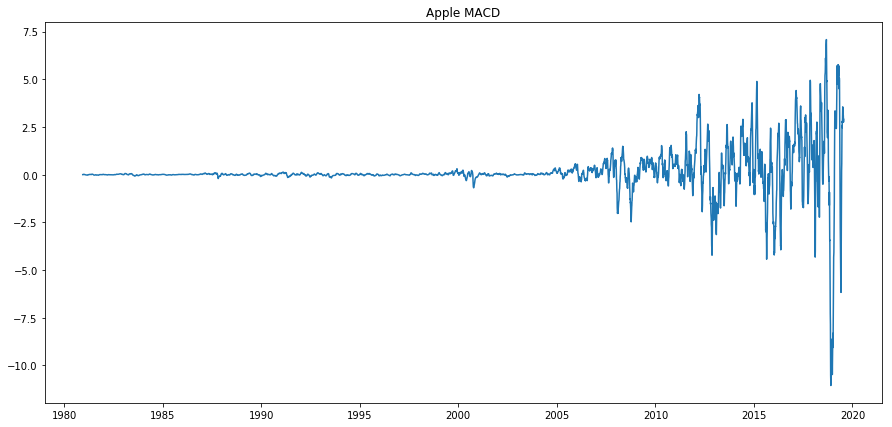

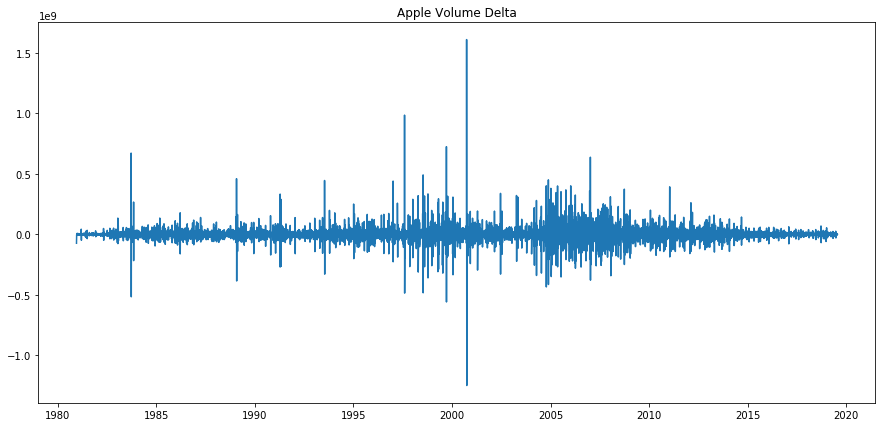

In [4]:
stock_data = get_stock_stats(cur_ticker, company_name, target_length)

--------

In [5]:
training_data, testing_data = sort_stock_data(stock_data)

In [6]:
x_train, y_train = preprocess_stock_data(training_data, seq_length)

In [7]:
x_test, y_test = preprocess_stock_data(testing_data, seq_length)

In [8]:
print(f'Train data: {len(x_train)}. Test data: {len(x_test)}')
print(f'Train sells: {y_train.count(0)}. Buys: {y_train.count(1)}')
print(f'Test sells: {y_test.count(0)}. Buys: {y_test.count(1)}')

Train data: 7716. Test data: 382
Train sells: 3858. Buys: 3858
Test sells: 191. Buys: 191


---------------------

In [9]:
make_stock_rnn(x_train, y_train, x_test, y_test, seq_length, target_length, company_name)

W0723 17:32:08.602800 140617781671744 deprecation.py:506] From /home/sean/.local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 7716 samples, validate on 382 samples


W0723 17:32:10.076802 140617781671744 deprecation.py:323] From /home/sean/.local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
7716/7716 [==============================] - 36s 5ms/sample - loss: 0.8188 - acc: 0.5175 - val_loss: 0.6952 - val_acc: 0.5000
Epoch 2/10
7716/7716 [==============================] - 33s 4ms/sample - loss: 0.7059 - acc: 0.5415 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 3/10
7716/7716 [==============================] - 29s 4ms/sample - loss: 0.6931 - acc: 0.5551 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 4/10
7716/7716 [==============================] - 32s 4ms/sample - loss: 0.6878 - acc: 0.5546 - val_loss: 0.6936 - val_acc: 0.4503
Epoch 5/10
7716/7716 [==============================] - 31s 4ms/sample - loss: 0.6835 - acc: 0.5638 - val_loss: 0.6985 - val_acc: 0.4162
Epoch 6/10
7716/7716 [==============================] - 26s 3ms/sample - loss: 0.6769 - acc: 0.5726 - val_loss: 0.6917 - val_acc: 0.5524
Epoch 7/10
7716/7716 [==============================] - 24s 3ms/sample - loss: 0.6773 - acc: 0.5671 - val_loss: 0.6900 - val_acc: 0.5916
Epoch 8/10
7716/7716 [===================